# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


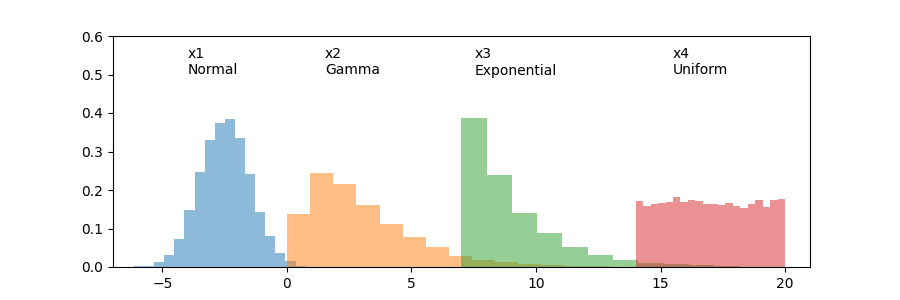

Text(15.493550751299491, 0.5, 'x4\nUniform')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5)
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


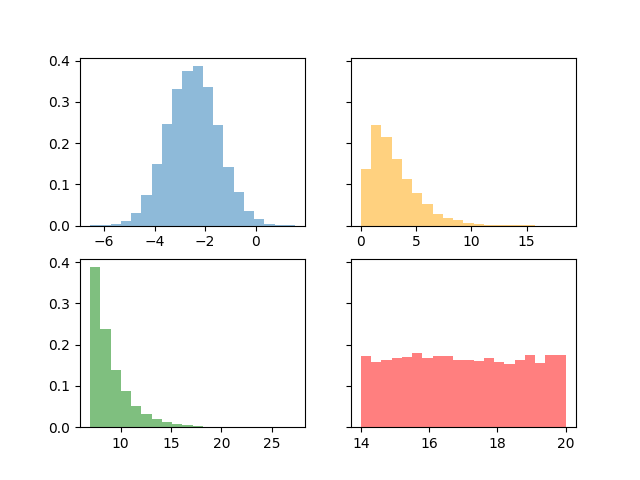

In [3]:
fig,ax = plt.subplots(2, 2, sharey=True)
ax[0][0].hist(x1, density=True, bins=20, alpha=0.5)
ax[0][1].hist(x2, density=True, bins=20, alpha=0.5,color='orange')
ax[1][0].hist(x3, density=True, bins=20, alpha=0.5,color='green')
ax[1][1].hist(x4, density=True, bins=20, alpha=0.5,color='red')
fig.show()

In [7]:
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

n = 100

x1 = np.random.normal(0, 1, n)
x2 = np.random.gamma(3, 1, n)
x3 = np.random.exponential(1, n)
x4 = np.random.uniform(-4,4, n)

def update(curr):
    
    gspec = gridspec.GridSpec(9, 2)
    
    normal_hist = plt.subplot(gspec[:3, :1])
    gamma_hist = plt.subplot(gspec[:3, 1:])
    unif_hist = plt.subplot(gspec[6:, :1])
    expo_hist = plt.subplot(gspec[6:, 1:])
    indicator = plt.subplot(gspec[4, 0:])
      
    l = [normal_hist,gamma_hist,expo_hist,unif_hist]
    
    if curr == n: 
        a.event_source.stop()
        
    for ax in l:
        ax.cla()
    
    normal_hist.hist(x1[:curr], density = True, bins =np.arange(-4, 4, 0.5), alpha = 0.5)
    normal_hist.axis([-4,4,0,0.6])
    normal_hist.set_title('normal distribution')
    
    
    gamma_hist.hist(x2[:curr], density = True, bins = np.arange(0, 10, 0.5), alpha = 0.5, color = 'r')
    gamma_hist.axis([0,10,0,0.4])
    gamma_hist.set_title('gamma distribution')
   
    
    expo_hist.hist(x3[:curr], density = True, bins = np.arange(0, 5, 0.5), alpha = 0.5, color = 'm')
    expo_hist.axis([0,5,0,0.8])
    expo_hist.set_title('exponential distribution')
    
    
    unif_hist.hist(x4[:curr], density = True, bins = np.arange(-4, 4, 0.5), alpha = 0.5, color = 'y')
    unif_hist.axis([-4,4,0,0.9])
    unif_hist.set_title('uniform distribution')
    
    
    indicator.annotate('n = {}'.format(curr), [0.42,0.5], fontsize = 20)
    
    indicator.spines['right'].set_visible(False)
    indicator.spines['top'].set_visible(False)
    indicator.spines['bottom'].set_visible(False)
    indicator.spines['left'].set_visible(False)
    
    indicator.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')


<IPython.core.display.Javascript object>


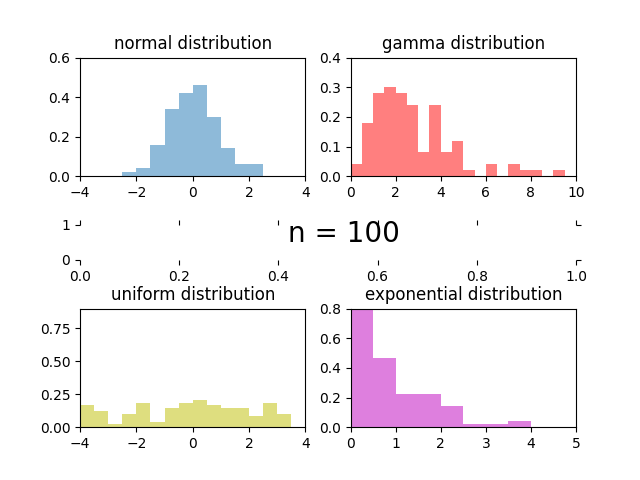

In [8]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)